# K- Nearest Neighbour

### 1. Importing Libraries

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from collections import defaultdict

### 2. Data Preprocessing

In [3]:
pima = pd.read_csv("diabetes.csv")

pima.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
#normalizing the dataset
scalar = preprocessing.MinMaxScaler()
pima = scalar.fit_transform(pima)

#split dataset in features and target variable

X = pima[:,:8]
y = pima[:, 8]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(537, 8) (231, 8) (537,) (231,)


In [5]:
# finding the value of k
k = int(math.sqrt(len(Y_test)))
print(k) # it's an odd number so we will be taking this as k for now

15


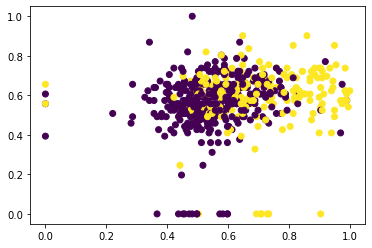

In [6]:
#plotting the data for one feature
plt.scatter(X_train[:,1], X_train[:, 2], c = Y_train)

### 3. Required functions

In [18]:
def euclDist(X_train, Y_train, test_pt):
    
    i = 0
    dist_list = []
    for el in X_train:
        d = np.sum((test_pt - el)**2)
        label = Y_train[i]
        dist_list.append((d, label))
        i = i + 1
    
    return dist_list


def score(Y_pred, Y_test):
    
    correct_pred = np.sum(Y_pred == Y_test)
    
    return correct_pred / Y_pred.shape[0]  


def KNNClassifier(X_train, Y_train, X_test, Y_test, k = 5): #defialt value of k is 5
    
    Y_pred = []
    for test_pt in X_test:

        dist_list = euclDist(X_train, Y_train, test_pt)

        dist_list.sort()
        f = defaultdict(int)
        for j in range(k):
            f[dist_list[j][1]] = f[dist_list[j][1]] + 1

        maxVal = - 1000000000
        l = -1

        for key in f:
            if(f[key] > maxVal):
                maxVal = f[key]
                l = key

        Y_pred.append(l)
    
    return Y_pred
    

In [19]:
Y_pred = KNNClassifier(X_train, Y_train, X_test, Y_test, 13)

In [20]:
print("The accuracy of the model is : {0}".format(score(np.array(Y_pred), Y_test)))

The accuracy of the model is : 0.6926406926406926
